In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

%config InlineBackend.figure_format = 'retina'

In [2]:
w = np.arange(0, 1, 0.001)

In [3]:
d = 500
n = 1000

In [4]:
def pdf(w, d, n):
    first_term = 2 * d * n * w * (1 - w)
    second_term = (1 - (1 - w)**2)**(d - 1)
    third_term = (1 - (1 - (1 - w)**2 )**d )**(n - 1)
    return first_term * second_term * third_term

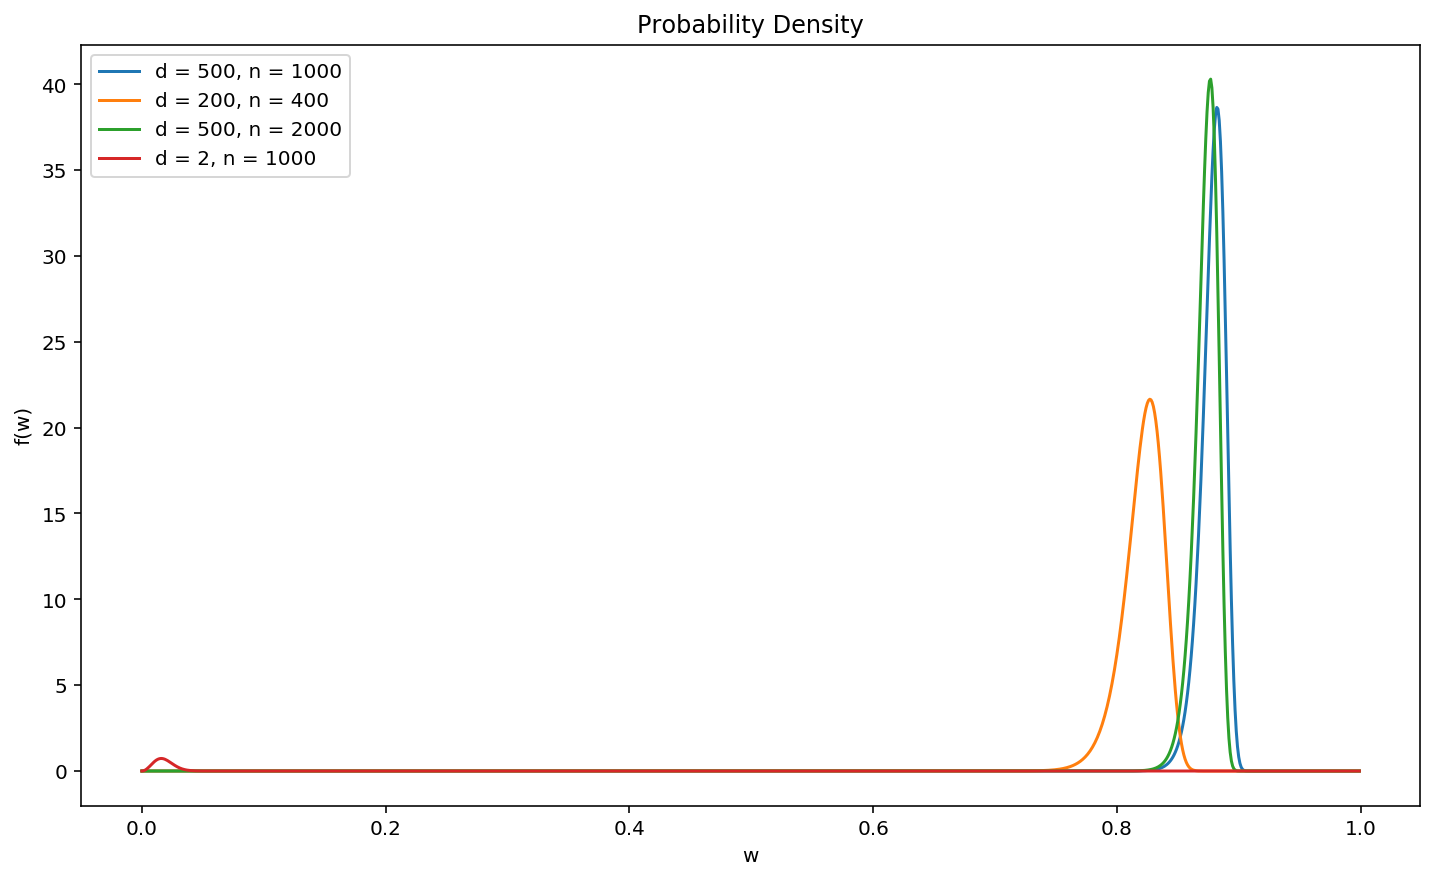

In [5]:
plt.figure(figsize=(12, 7))

d_n_tuples = [(500, 1000), (200, 400), (500, 2000), (2, 1000)]
legend = []
for d, n in d_n_tuples:
    plt.plot(w, pdf(w, d, n))
    plt.xlabel('w')
    plt.ylabel('f(w)')
    plt.title('Probability Density')
    legend.append(f'd = {d}, n = {n}')
plt.legend(legend)
plt.show()

In [6]:
def cdf(w, d, n):
    return 1 - (1 - (1 - (1 - w)**2 )**d )**n

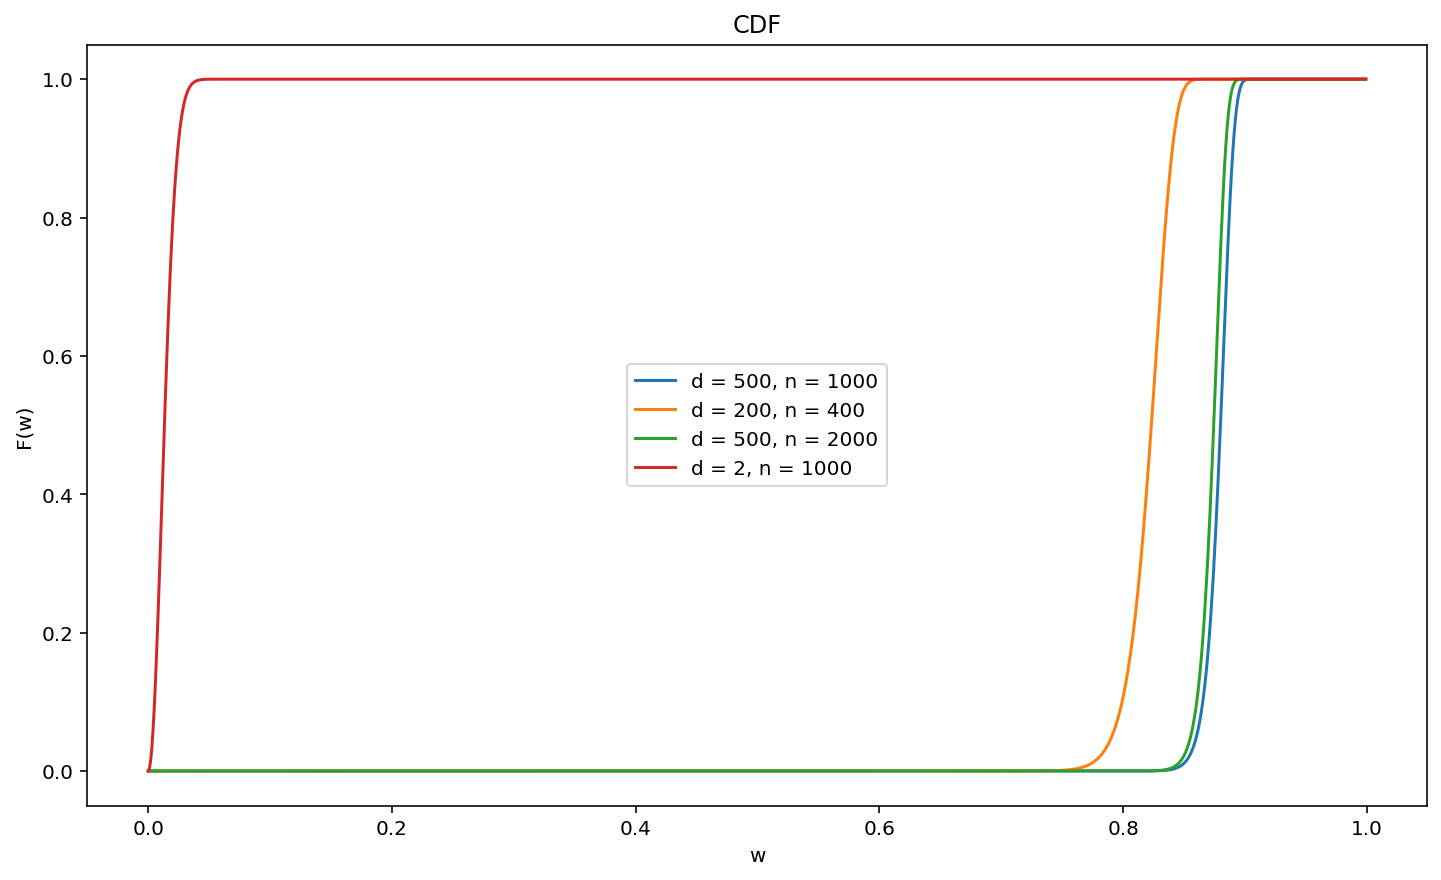

In [7]:
plt.figure(figsize=(12, 7))

d_n_tuples = [(500, 1000), (200, 400), (500, 2000), (2, 1000)]
legend = []
for d, n in d_n_tuples:
    plt.plot(w, cdf(w, d, n))
    plt.xlabel('w')
    plt.ylabel('F(w)')
    plt.title('CDF')
    legend.append(f'd = {d}, n = {n}')
plt.legend(legend)
plt.show()

In [8]:
def expected_value_inner(w, d, n):
    return pdf(w, d, n) * w
    
    
def expected_value(w, d, n):
    expected_value_res = integrate.quad(expected_value_inner, 0, 1, args=(d, n))
    return expected_value_res[0]

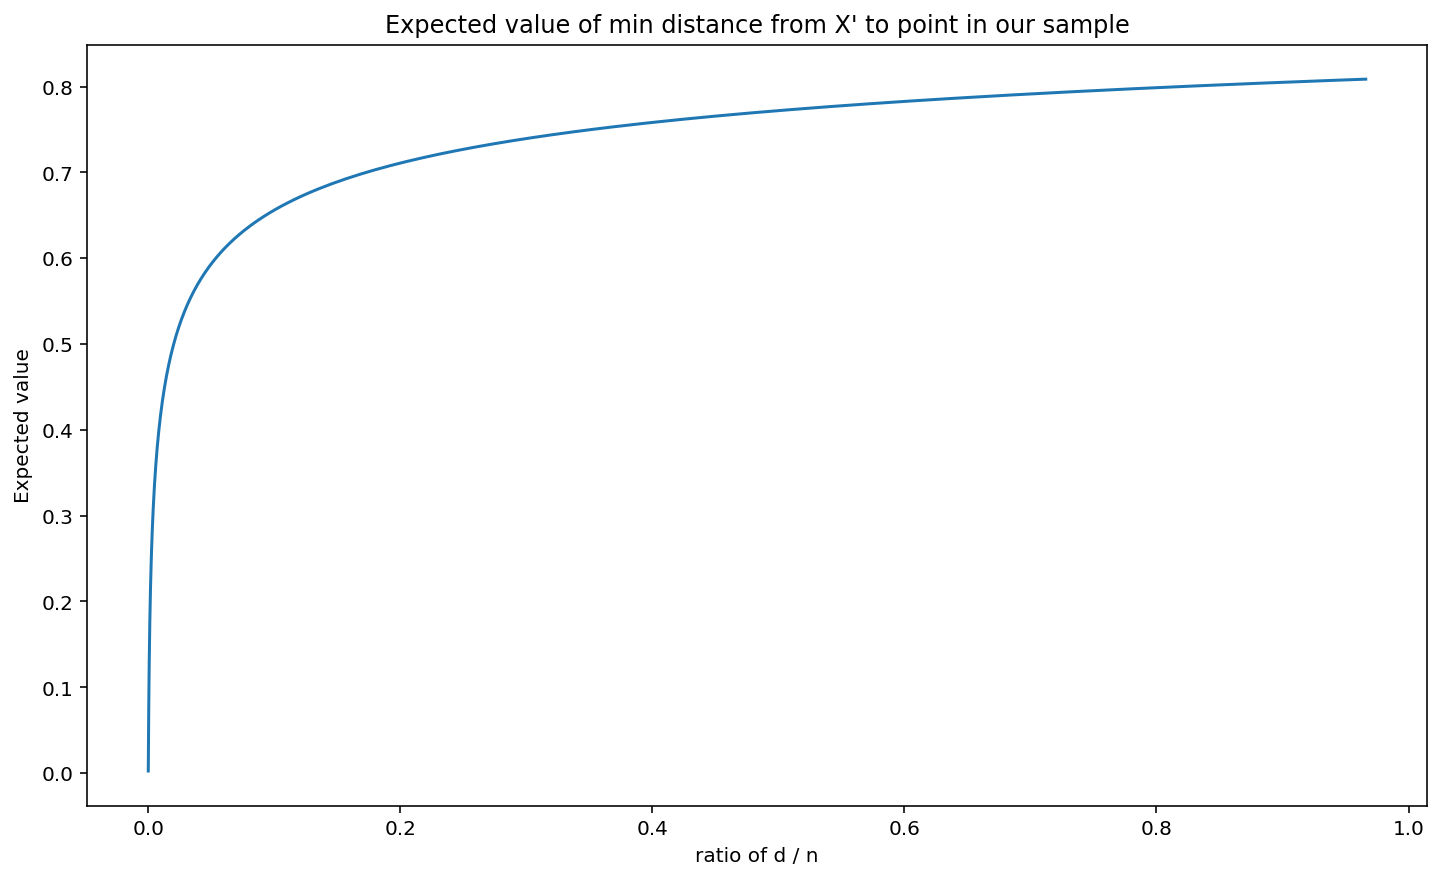

In [10]:
d_times_n = 500_000
d_tmp = 5
n_tmp = d_times_n / d_tmp

d_n_tuples = []
while d_tmp < 700:
    d_n_tuples.append((d_tmp, n_tmp))
    d_tmp += 5
    n_tmp = d_times_n / d_tmp
    
plt.figure(figsize=(12, 7))

legend = []
idxs = []
expected_values = []
for d, n in d_n_tuples:
    ratio = d / n
    idxs.append(ratio)
    expected_values.append(expected_value(w, d, n))
plt.plot(idxs, expected_values)

plt.xlabel('ratio of d / n')
plt.ylabel('Expected value')
plt.title("Expected value of min distance from X' to point in our sample" )
plt.show()

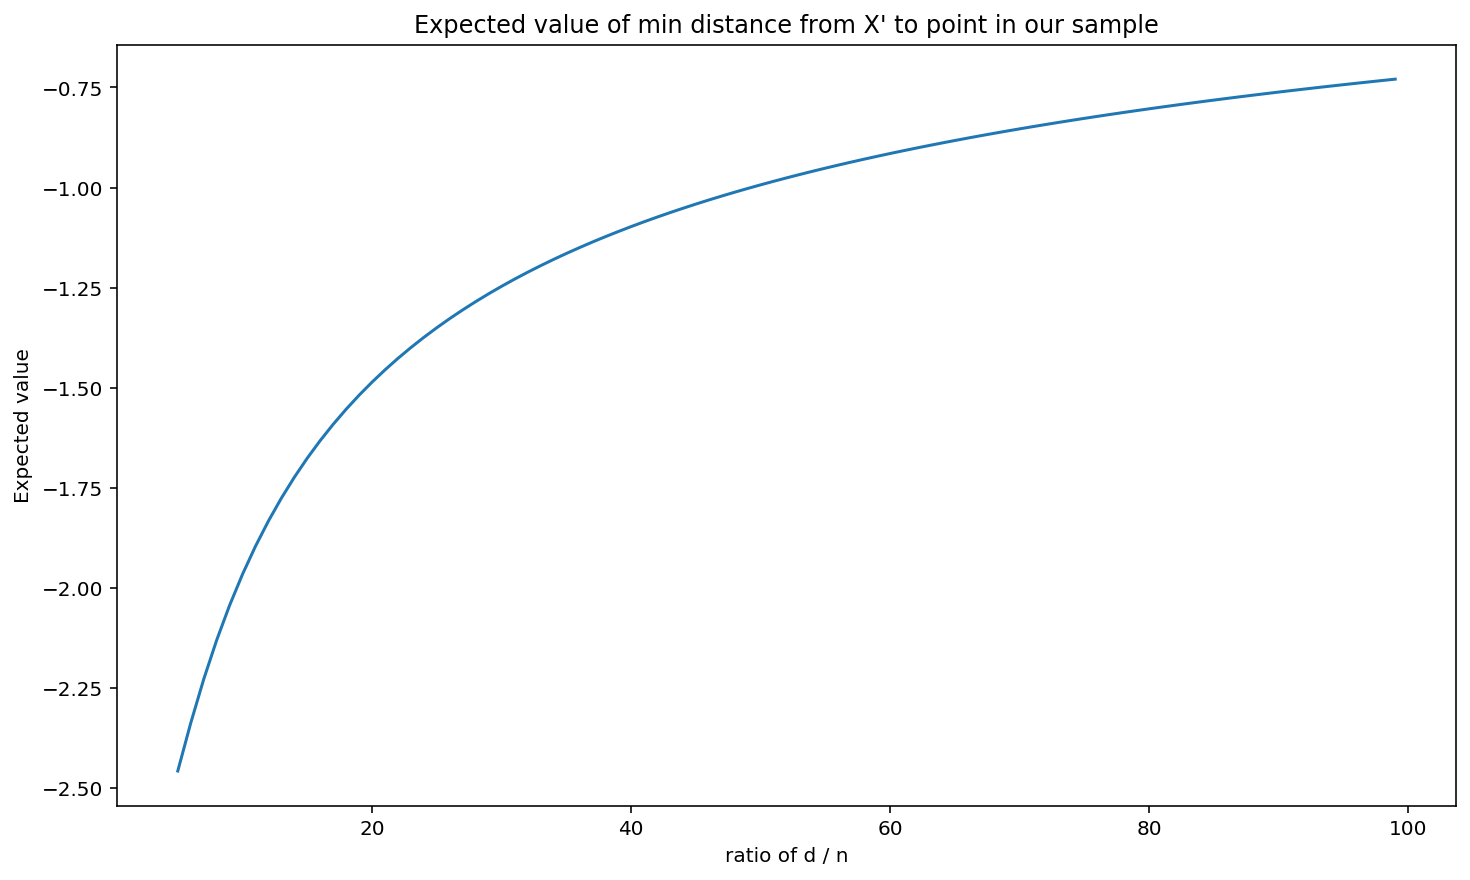

In [19]:
ds = np.arange(5, 100, 1)
ns = ds**2
    
plt.figure(figsize=(12, 7))

legend = []
idxs = []
expected_values = []
for d, n in zip(ds, ns):    
    idxs.append(d)
    expected_values.append(np.log(expected_value(w, d, n)))
plt.plot(idxs, expected_values)

plt.xlabel('ratio of d / n')
plt.ylabel('Expected value')
plt.title("Expected value of min distance from X' to point in our sample" )
plt.show()

In [20]:
delta = 1/3 

In [25]:
d = 200

In [26]:
(1 / (2 * delta))**d

1.6529199107882081e+35